In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Basic Graph

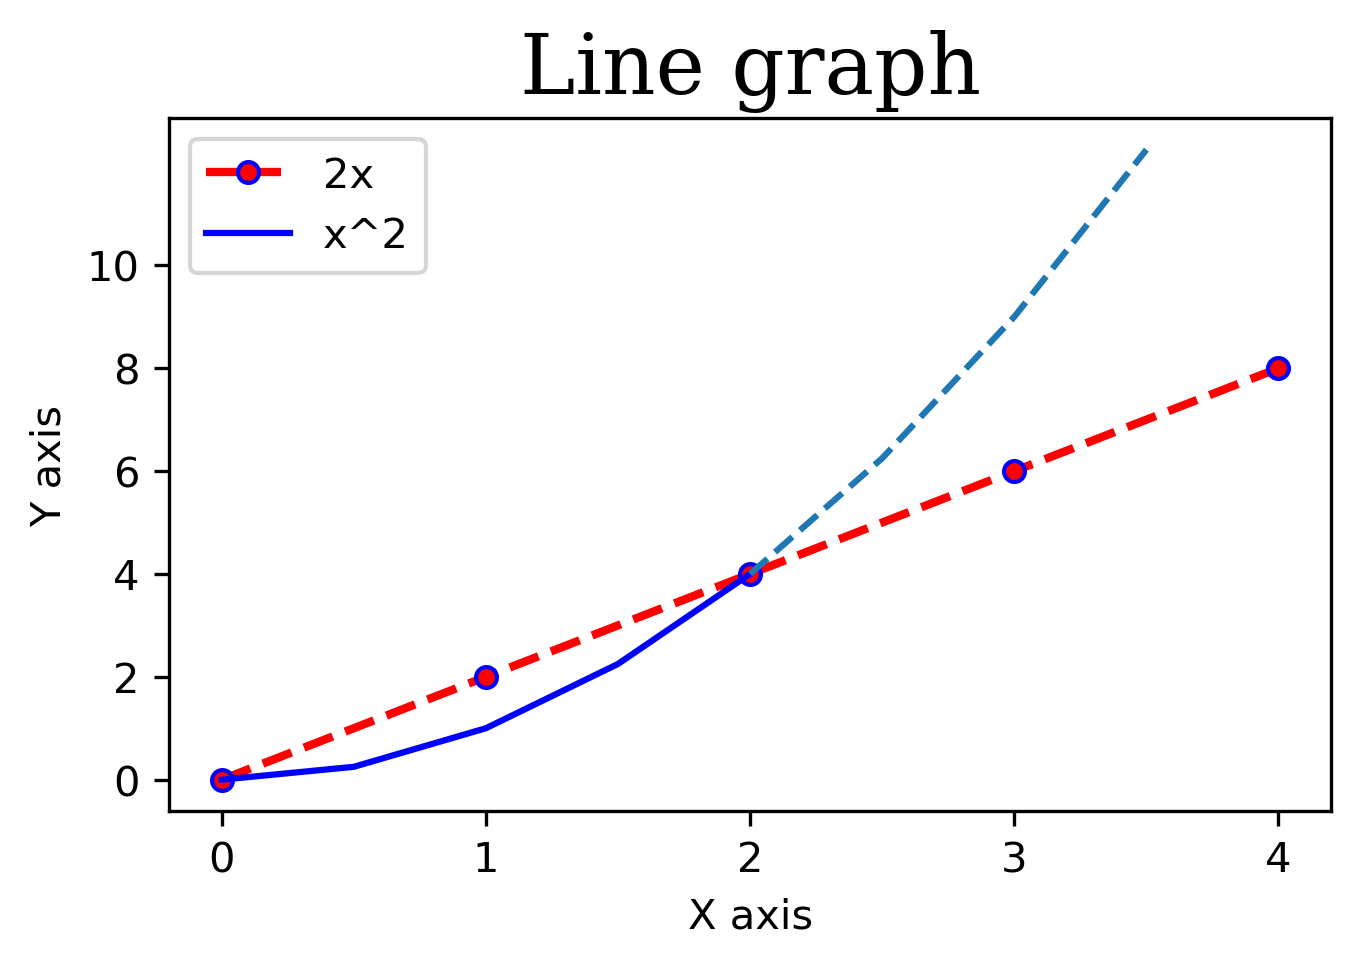

In [9]:
x=[0,1,2,3,4]
y=[0,2,4,6,8]

plt.figure(figsize=(5,3),dpi=300)

#line 1
plt.plot(x,y,label='2x',color='red',linewidth=2,linestyle='--',marker='.',markersize=10,markeredgecolor='blue')
#line 2
x2=np.arange(0,4,0.5)
plt.plot(x2[:5],x2[:5]**2,label='x^2',color='blue')
plt.plot(x2[4:],x2[4:]**2,linestyle='--')

plt.title('Line graph',fontdict={'fontname':'DejaVu Serif','fontsize':20})
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.xticks([0,1,2,3,4])
plt.yticks([0,2,4,6,8,10])

plt.legend()

#To save
#plt.save_fig('Line_graph.png',dpi=300)

plt.show()

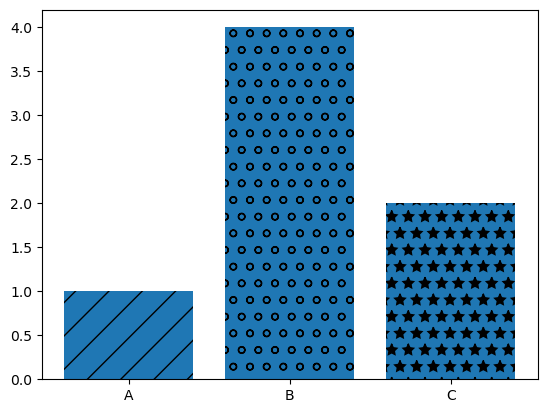

In [10]:
labels=['A','B','C']
values=[1,4,2]

bars=plt.bar(labels,values)
patterns=['/','o','*']
"""
bar[0].set_hatch('/')
bar[1].set_hatch('o')
bar[2].set_hatch('*')
"""
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.show()

# Visualizing real world datasets

## Gas price visualization

In [13]:
gas=pd.read_csv('datasets/gas_prices.csv')
gas.head(5)

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


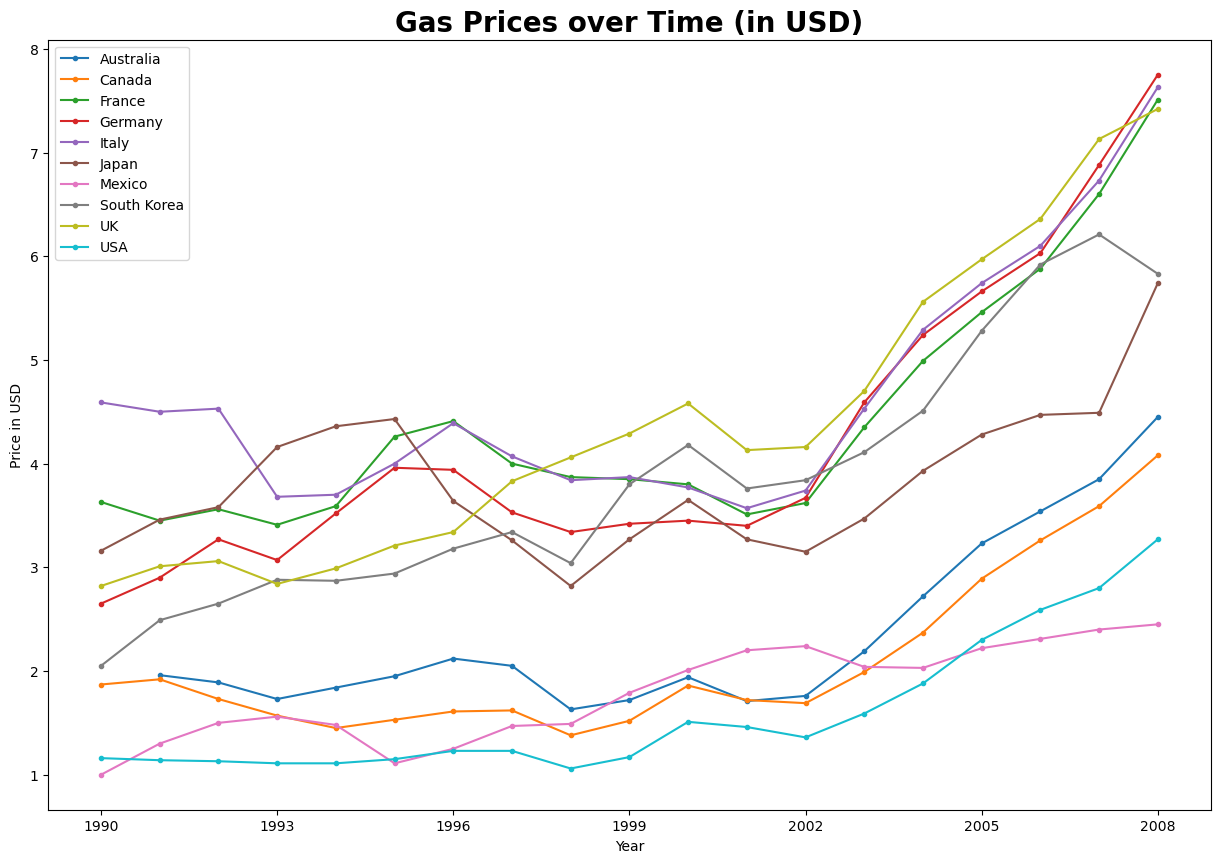

In [14]:
plt.figure(figsize=(15,10))

plt.title('Gas Prices over Time (in USD)',fontdict={'fontweight':'bold','fontsize':20})
"""
plt.plot(gas.Year,gas.USA,label='USA',marker='.',linestyle='-')
plt.plot(gas.Year,gas.Canada,label='Canada',marker='.',linestyle='-')
plt.plot(gas.Year,gas['South Korea'],label='South Korea',marker='.',linestyle='-')
plt.plot(gas.Year,gas.Australia,label='Australia',marker='.',linestyle='-')
"""
for country in gas:
    if country!='Year':
        plt.plot(gas.Year,gas[country],marker='.',linestyle='-',label=country)

plt.xticks(gas.Year[::3])

plt.xlabel('Year')
plt.ylabel('Price in USD')

plt.legend()

plt.show()

## Visualizing fifa dataset

In [16]:
fifa=pd.read_csv('datasets/fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


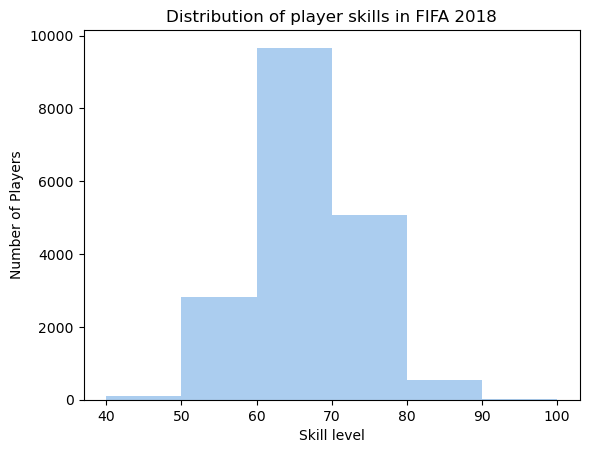

In [39]:
bins=[40,50,60,70,80,90,100]

plt.hist(fifa.Overall,bins=bins,color='#abcdef')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill level')
plt.title('Distribution of player skills in FIFA 2018')

plt.show()

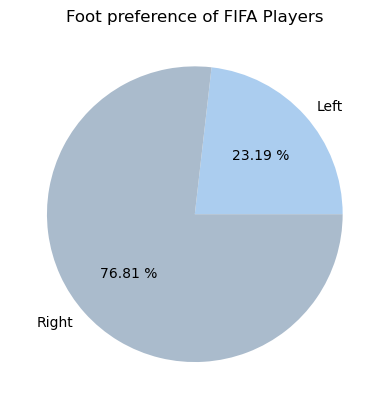

In [73]:
left=fifa.loc[fifa['Preferred Foot']=='Left'].count().iloc[0]
right=fifa.loc[fifa['Preferred Foot']=='Right'].count().iloc[0]

labels=['Left','Right']
colors=['#abcdef','#aabbcc']

plt.pie([left,right],labels=labels,colors=colors,autopct='%.2f %%')

plt.title('Foot preference of FIFA Players')

plt.show()

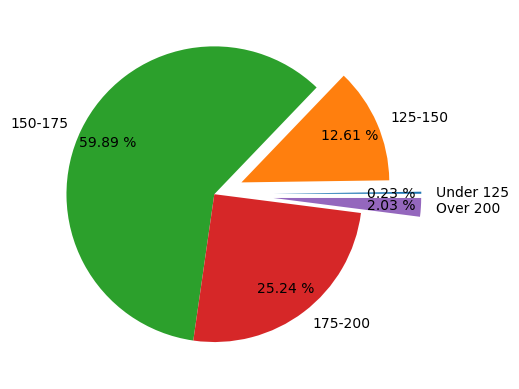

In [104]:
fifa.Weight=[int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

light=fifa.loc[fifa.Weight<125].count().iloc[0]
light_medium=fifa.loc[(fifa.Weight>=125)&(fifa.Weight<150)].count().iloc[0]
medium=fifa.loc[(fifa.Weight>=150)&(fifa.Weight<175)].count().iloc[0]
medium_heavy=fifa.loc[(fifa.Weight>=175)&(fifa.Weight<200)].count().iloc[0]
heavy=fifa.loc[fifa.Weight>=200].count().iloc[0]

weights=[light,light_medium,medium,medium_heavy,heavy]
labels=['Under 125','125-150','150-175','175-200','Over 200']
explode=(.4,.2,0,0,.4)

plt.pie(weights,labels=labels,autopct='%.2f %%',pctdistance=0.8,explode=explode)

plt.show()